In [1]:
# This is to access google drive to load data
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


#Imports

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import glob
import tensorflow as tf

from random import randint
from numpy import argmax
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split

from skimage.transform import resize
from scipy import stats

from keras import optimizers, regularizers, layers
from keras.layers import LeakyReLU
from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model, Sequential
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Add, Input, Lambda, Dense, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout, ZeroPadding2D, BatchNormalization, Cropping2D, LSTM
from keras.utils.np_utils import to_categorical
from torchvision.transforms import Compose, ToTensor, Normalize, RandomRotation, ToPILImage
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR

from tqdm import tqdm
from tqdm import tqdm_notebook

import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# Read the Dataset

read training data

In [0]:
data = pd.read_csv('/content/gdrive/My Drive/sphere/training_data/train_training.csv')

In [4]:
data

,sample,sample_index,start,end,a_ascend,a_descend,a_jump,a_loadwalk,a_walk,p_bent,p_kneel,p_lie,p_sit,p_squat,p_stand,t_bend,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z,acceleration_x,acceleration_y,acceleration_z,acceleration_Kitchen_AP,acceleration_Lounge_AP,acceleration_Upstairs_AP,acceleration_Study_AP,pir_bath,pir_bed1,pir_bed2,pir_hall,pir_kitchen,pir_living,pir_stairs,pir_study,pir_toilet
0,1,0,46.0,47.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9668,-0.4514,0.0262,-73.400000,-85.2000,-76.750000,0.00,False,False,False,False,False,False,True,True,False
1,1,1,47.0,48.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3769,-0.4088,0.7586,-90.384615,-75.4500,-90.800000,0.00,False,False,False,False,False,False,True,True,False
2,1,2,48.0,49.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6807,-0.3598,0.5668,0.000000,-68.9000,-93.000000,0.00,False,False,False,False,False,False,True,True,False
3,1,3,49.0,50.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8571,-0.4462,0.2587,-102.000000,-79.1500,-97.909091,0.00,False,False,False,False,False,False,True,False,False
4,1,4,50.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6775,-0.6250,0.2543,-96.666667,-81.3125,-91.000000,0.00,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14339,9,1823,1833.0,1834.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1677,-0.9581,-0.0441,-77.000000,0.0000,-79.650000,-78.05,False,False,False,False,False,False,False,False,False
14340,9,1824,1834.0,1835.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1636,-0.9547,-0.0357,-77.000000,0.0000,-78.600000,-77.45,False,False,False,False,False,False,False,False,False
14341,9,1825,1835.0,1836.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1675,-0.9546,-0.0420,-76.400000,0.0000,-79.000000,-76.85,False,False,False,False,False,False,False,False,False
14342,9,1826,1836.0,1837.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1751,-0.9528,-0.0511,-77.000000,0.0000,-79.100000,-77.30,False,False,False,False,False,False,False,False,False


test data

In [0]:
data_test = pd.read_csv('/content/gdrive/My Drive/sphere/training_data/train_testing.csv')

In [6]:
data_test

,sample,sample_index,start,end,a_ascend,a_descend,a_jump,a_loadwalk,a_walk,p_bent,p_kneel,p_lie,p_sit,p_squat,p_stand,t_bend,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z,acceleration_x,acceleration_y,acceleration_z,acceleration_Kitchen_AP,acceleration_Lounge_AP,acceleration_Upstairs_AP,acceleration_Study_AP,pir_bath,pir_bed1,pir_bed2,pir_hall,pir_kitchen,pir_living,pir_stairs,pir_study,pir_toilet
0,10,0,13.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8848,0.2555,0.2956,-84.600,0.0,-91.30,-84.0,False,False,False,False,False,False,False,False,False
1,10,1,14.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8843,0.2564,0.2953,-84.375,0.0,-92.25,-86.0,False,False,False,False,False,False,False,False,False
2,10,2,15.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8877,0.2560,0.2941,-86.300,0.0,-93.10,-86.8,False,False,False,False,False,False,False,False,False
3,10,3,16.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8851,0.2550,0.2922,-86.500,0.0,-92.70,-83.6,False,False,False,False,False,False,False,False,False
4,10,4,17.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8846,0.2585,0.2907,-83.700,0.0,-93.50,-85.4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,10,1774,1787.0,1788.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8691,0.3636,0.1139,-81.400,0.0,-88.60,-79.2,False,False,False,False,False,False,False,False,False
1775,10,1775,1788.0,1789.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8709,0.3621,0.1108,-81.400,0.0,-88.40,-80.2,False,False,False,False,False,False,False,False,False
1776,10,1776,1789.0,1790.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8668,0.3586,0.1127,-81.600,0.0,-88.20,-78.0,False,False,False,False,False,False,False,False,False
1777,10,1777,1790.0,1791.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-640.0,-480.0,-640.0,-480.0,-640.0,-480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8706,0.3578,0.1038,-81.600,0.0,-86.20,-80.8,False,False,False,False,False,False,False,False,False


# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


In [0]:
Xy = data.values
Xy = Xy.astype(float)

# index 39 40 41 are acceleration in x y z respectively
X = Xy[:,[39,40,41]]

#these are the probability vectors
y = Xy[:,4:24]

In [289]:
y[:,0].shape

(14344,)

In [290]:
clf = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X, y)

ValueError: ignored

#Feed-Forward Neural Net



In [0]:
def NeuralNet(input_layer):
    """A Simple MLP model)""" 

    Dense1 = Dense(20, activation="relu", use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(input_layer)

    Dense2 = Dense(20, activation="relu", use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(Dense1)

    Dense3 = Dense(20, activation="relu", use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(Dense2)

    final_output_layer = Dense(20, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(Dense3)
    
    return final_output_layer

input_layer = Input(shape=(3,))
output_layer = NeuralNet(input_layer)

In [0]:
model = Model(input_layer, output_layer)

In [0]:
sgd = optimizers.SGD(lr=0.000099, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss="mean_absolute_error", optimizer=sgd, metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])


In [69]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 20)                80        
_________________________________________________________________
dense_26 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_27 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_28 (Dense)             (None, 20)                420       
Total params: 1,340
Trainable params: 1,340
Non-trainable params: 0
_________________________________________________________________


In [70]:
Xy = data.values
Xy = Xy.astype(float)

# index 39 40 41 are acceleration in x y z respectively
X = Xy[:,[39,40,41]]

#these are the probability vectors
y = Xy[:,4:24]

y.shape

(14344, 20)

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=40)

In [72]:
early_stopping = EarlyStopping(patience=150, verbose=1)
model_checkpoint = ModelCheckpoint("./keras.model", save_best_only=True, monitor='val_loss', mode='auto', verbose=1, )
reduce_lr = ReduceLROnPlateau(factor=0.25, patience=40, min_lr=0.000003, verbose=1)

epochs = 20
batch_size = 10

history = model.fit(X_train, y_train,
                    validation_data=[X_valid, y_valid], 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr], shuffle=True)

Train on 11475 samples, validate on 2869 samples
Epoch 1/20
11475/11475 [==============================] - 1s 126us/step - loss: 2.7903 - accuracy: 0.3352 - val_loss: 2.6077 - val_accuracy: 0.3730

Epoch 00001: val_loss improved from inf to 2.60768, saving model to ./keras.model
Epoch 2/20
11475/11475 [==============================] - 1s 117us/step - loss: 2.4152 - accuracy: 0.3729 - val_loss: 2.2786 - val_accuracy: 0.3730

Epoch 00002: val_loss improved from 2.60768 to 2.27862, saving model to ./keras.model
Epoch 3/20
11475/11475 [==============================] - 1s 118us/step - loss: 2.2081 - accuracy: 0.3729 - val_loss: 2.1762 - val_accuracy: 0.3730

Epoch 00003: val_loss improved from 2.27862 to 2.17625, saving model to ./keras.model
Epoch 4/20
11475/11475 [==============================] - 1s 116us/step - loss: 2.1416 - accuracy: 0.3729 - val_loss: 2.1333 - val_accuracy: 0.3730

Epoch 00004: val_loss improved from 2.17625 to 2.13326, saving model to ./keras.model
Epoch 5/20
1147

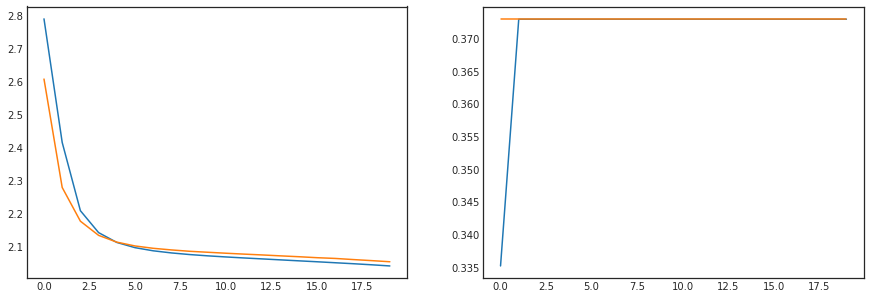

In [73]:
# Plot Accuracy and Loss wrt number of epochs
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(15,5))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax_acc.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
ax_acc.plot(history.epoch, history.history["val_accuracy"], label="Validation accuracy")

In [75]:
prediction = model.predict(X)
prediction[0]

array([0.00688424, 0.00679402, 0.00346704, 0.00648297, 0.12017316,
       0.04886353, 0.01671221, 0.06986651, 0.147222  , 0.00876542,
       0.40348285, 0.01601162, 0.00905496, 0.00997612, 0.00820934,
       0.01447839, 0.0066016 , 0.01329871, 0.01382331, 0.06983195],
      dtype=float32)

In [0]:
test_dataset = data_test.values
test_dataset = test_dataset.astype(float)
test = test_dataset[:,[39,40, 41]]
testy = test_dataset[:,[39,40, 41]]

#predict the test set
predicted_probabilities=model.predict(test)

In [99]:
#prediction
print(predicted_probabilities[0])
#ground truth
print(test_dataset[0,4:24])

[0.01012799 0.00882925 0.00602108 0.00874465 0.10862284 0.05005157
 0.02078441 0.08455402 0.15953699 0.01047876 0.34992206 0.0201458
 0.00947158 0.01411229 0.01319853 0.01526051 0.0070823  0.01843412
 0.01848577 0.06613541]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# LSTM

In [0]:
Xy = data.values
Xy = Xy.astype(float)

# index 39 40 41 are acceleration in x y z respectively
X = Xy[:,[39,40,41]]

#these are the probability vectors
y = Xy[:,4:24]

TIME_STEPS = 3
BATCH_SIZE = 10

In [0]:
test_dataset = data_test.values
test_dataset = test_dataset.astype(float)
test = test_dataset[:,[39,40, 41]]
testy = test_dataset[:,4:24]

In [0]:
def build_timeseries(mat):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        #y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x#, y

def build_timeseries_y(mat):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i+TIME_STEPS-1:TIME_STEPS+i]
        #if i == 0:
        #y[i] = mat[TIME_STEPS+i, y_col_index]
    
    y = np.zeros((x.shape[0], 20))
    for i in range(x.shape[0]):
        y[i] = x[i][0]
        if i == 0:
          print(y[i])


    print("length of time-series i/o",y.shape)

    return y#, y

In [0]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [57]:
x_t = build_timeseries(X)
y_t = build_timeseries_y(y)

x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)

test_t = build_timeseries(test)
testy_t = build_timeseries_y(testy)

test_t = trim_dataset(test_t, BATCH_SIZE)
testy_t = trim_dataset(testy_t, BATCH_SIZE)

#x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE),2)
#x_temp, y_temp = build_timeseries(x_test, 3)
#y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



length of time-series i/o (14341, 3, 3) (14341,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.
 0.  0. ]
length of time-series i/o (14341, 20)



length of time-series i/o (1776, 3, 3) (1776,)



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
length of time-series i/o (1776, 20)


In [58]:
print(x_t.shape)
print(y_t.shape)

print(test_t.shape)
print(testy_t.shape)

(14340, 3, 3)
(14340, 20)
(1760, 3, 3)
(1760, 20)


In [42]:
x_t
y_t

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.05],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.5 ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [0]:
lstm_model = Sequential()
lstm_model.add(LSTM(20, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True, kernel_initializer='random_uniform'))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(20,activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.0001)
lstm_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [44]:
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (10, 20)                  1920      
_________________________________________________________________
dense_7 (Dense)              (10, 20)                  420       
_________________________________________________________________
dense_8 (Dense)              (10, 20)                  420       
Total params: 2,760
Trainable params: 2,760
Non-trainable params: 0
_________________________________________________________________


In [45]:
#csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'your_log_name' + '.log'), append=True)
#history = model.fit(x_t, y_t, epochs=20, verbose=2, batch_size=10,
#                    shuffle=False)#, #validation_data=(trim_dataset(x_t, 10),
                    #trim_dataset(y_t, 10))) #callbacks=[csv_logger])

early_stopping = EarlyStopping(patience=150, verbose=1)
model_checkpoint = ModelCheckpoint("./keras.model", save_best_only=True, monitor='val_loss', mode='auto', verbose=1, )
reduce_lr = ReduceLROnPlateau(factor=0.25, patience=40, min_lr=0.000003, verbose=1)

epochs = 20
batch_size = 10

history = lstm_model.fit(x_t, y_t,
                    validation_data=[x_t, y_t], 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr], shuffle=True)

Train on 14340 samples, validate on 14340 samples
Epoch 1/20
14340/14340 [==============================] - 4s 303us/step - loss: 2.4782 - val_loss: 2.1021

Epoch 00001: val_loss improved from inf to 2.10207, saving model to ./keras.model
Epoch 2/20
14340/14340 [==============================] - 4s 287us/step - loss: 2.0883 - val_loss: 2.0807

Epoch 00002: val_loss improved from 2.10207 to 2.08067, saving model to ./keras.model
Epoch 3/20
14340/14340 [==============================] - 4s 291us/step - loss: 2.0807 - val_loss: 2.0779

Epoch 00003: val_loss improved from 2.08067 to 2.07787, saving model to ./keras.model
Epoch 4/20
14340/14340 [==============================] - 4s 289us/step - loss: 2.0790 - val_loss: 2.0758

Epoch 00004: val_loss improved from 2.07787 to 2.07576, saving model to ./keras.model
Epoch 5/20
14340/14340 [==============================] - 4s 287us/step - loss: 2.0763 - val_loss: 2.0730

Epoch 00005: val_loss improved from 2.07576 to 2.07304, saving model to ./k

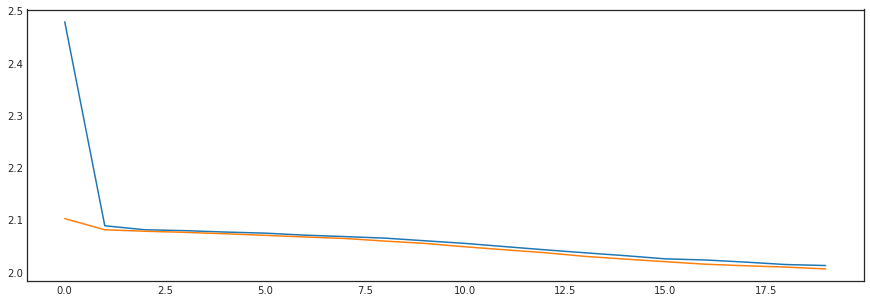

In [54]:
# Plot Accuracy and Loss wrt number of epochs
fig, (ax_loss) = plt.subplots(1, 1, figsize=(15,5))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")